### Task 1: Data Collection and Preprocessing
#### Importing the necessary libraries

In [2]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google_play_scraper import reviews_all


#### Script for Web Scraping

In [3]:

# Define the bank app IDs (not full URLs!)
bank_apps = {
    "CBE": "com.combanketh.mobilebanking",
    #"Dashen": "com.dashen.mobilebanking"
    "Dashen": "com.dashen.dashensuperapp",
    "BOA": "com.boa.boaMobileBanking"
}

# Initialize an empty list to store reviews
all_reviews = []

# Scrape reviews for each bank
for bank, app_id in bank_apps.items():
    print(f"📥 Scraping reviews for {bank}...")
    try:
        reviews = reviews_all(app_id, lang='en', country='ET')
        for review in reviews:
            all_reviews.append({
                "review": review['content'],
                "rating": review['score'],
                "date": review['at'],
                "bank": bank,
                "source": "Google Play"
            })
    except Exception as e:
        print(f"⚠️ Failed to scrape {bank}: {e}")






📥 Scraping reviews for CBE...
📥 Scraping reviews for Dashen...
📥 Scraping reviews for BOA...


In [16]:
# Convert to DataFrame
df_reviews = pd.DataFrame(all_reviews)

In [28]:
print(df_reviews['bank'].value_counts())

bank
CBE       5521
BOA        786
Dashen     363
Name: count, dtype: int64


In [39]:
# Remove duplicates
df_reviews.drop_duplicates(subset=["review"], inplace=True)


In [40]:
# Normalize dates to YYYY-MM-DD
df_reviews['date'] = pd.to_datetime(df_reviews['date']).dt.strftime('%Y-%m-%d')


In [49]:
# Save to CSV
df_reviews.to_csv('bank_reviews.csv', index=False)

print("✅ Data collection and preprocessing completed. Saved as 'bank_reviews.csv'.")

✅ Data collection and preprocessing completed. Saved as 'bank_reviews.csv'.


### Load the Data

In [57]:
# Load your cleaned data
df = pd.read_csv('bank_reviews.csv')

# Set style for seaborn
sns.set(style="whitegrid")


In [64]:
# Count reviews per bank
review_counts = df['bank'].value_counts()

print("📊 Review counts per bank:")
print(review_counts)

# Check if any bank has fewer than 400 reviews
for bank, count in review_counts.items():
    if count < 400:
        print(f"⚠️ {bank} has only {count} reviews. Try scraping more.")
    else:
        print(f"✅ {bank} has {count} reviews.")


📊 Review counts per bank:
bank
CBE       5521
BOA        786
Dashen     363
Name: count, dtype: int64
✅ CBE has 5521 reviews.
✅ BOA has 786 reviews.
⚠️ Dashen has only 363 reviews. Try scraping more.


### Distribution of Ratings per Bank

In [74]:
df

,review,rating,date,bank,source
0,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play
1,I cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,Google Play
2,good,4,2025-06-05,CBE,Google Play
3,not functional,1,2025-06-05,CBE,Google Play
4,everytime you uninstall the app you have to re...,1,2025-06-04,CBE,Google Play
...,...,...,...,...,...
6665,Nice one.,5,2024-01-14,BOA,Google Play
6666,በጣም ደስ የሚል ለውጥ አናመሰግናለን 🇪🇹,5,2024-01-14,BOA,Google Play
6667,Best application👍Thank you ! Abyssinia bank.,5,2024-01-12,BOA,Google Play
6668,Absolutely it's fantastic apps this New apps i...,5,2024-01-11,BOA,Google Play


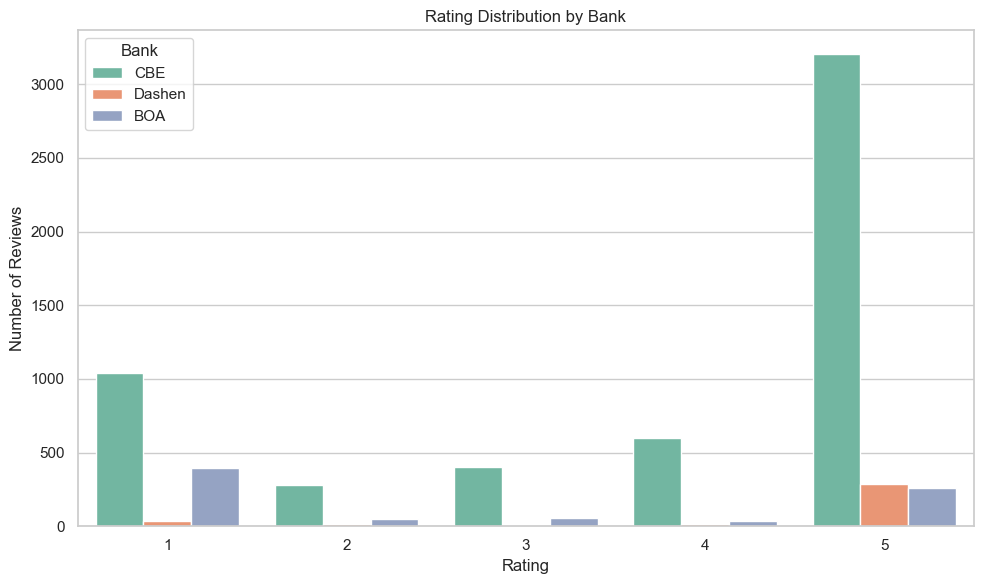

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='bank', palette='Set2')
plt.title('Rating Distribution by Bank')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Bank')
plt.tight_layout()
plt.show()


Based on the rating count plot:

- CBE bank has the highest number of reviews, with the majority of reviews being in the 5-star rating category.
- Dashen bank also has a significant number of reviews, with the majority in the 5-star and 5-star rating categories.
- BOA bank has the lowest number of reviews compared to the other two banks, with the majority in the 1-star and 5-star rating categories.

This data suggests that Dashen banks have generally received more positive customer reviews, with a higher proportion of 5-star.

### Trend of Reviews Over Time

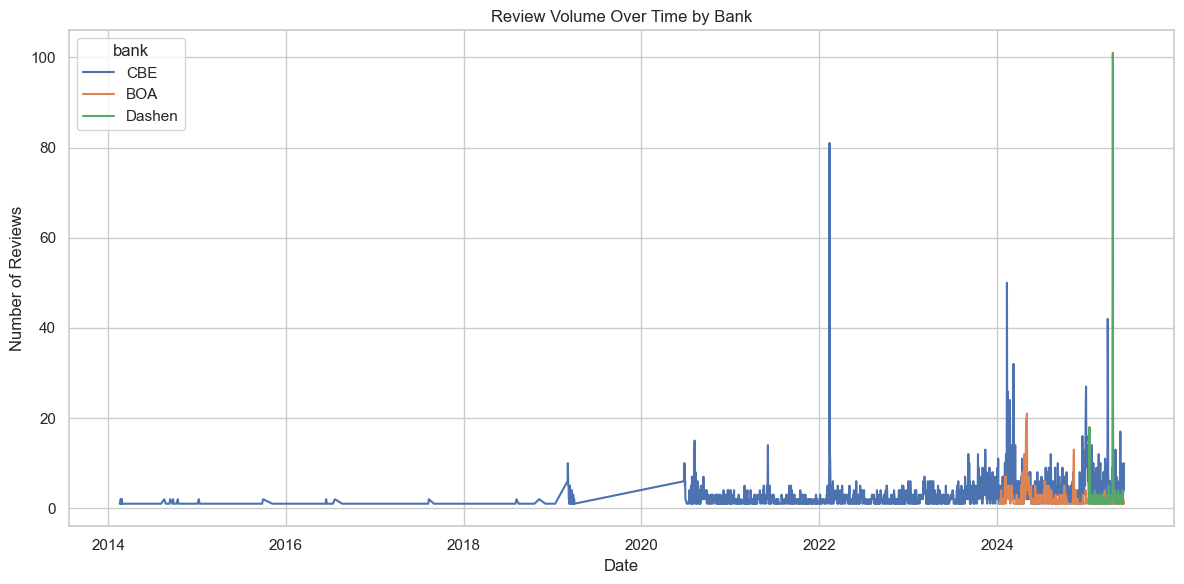

In [66]:
df['date'] = pd.to_datetime(df['date'])

# Group by date and bank
time_df = df.groupby(['date', 'bank']).size().reset_index(name='review_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df, x='date', y='review_count', hue='bank')
plt.title('Review Volume Over Time by Bank')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


Based on the line graph:

- The review volume for CBE bank has fluctuated significantly over time, with peaks and valleys throughout the years from 2014 to 2024 as shown.
- The review volume for BOA and Dashen bank has shown a significant review in 2024 
- Dashen bank has had the highest review volume, with a sharp spike in 2024.


### average rating per bank

C:\Users\smith\AppData\Local\Temp\ipykernel_10780\2792063824.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x='bank', y='rating', palette='viridis')


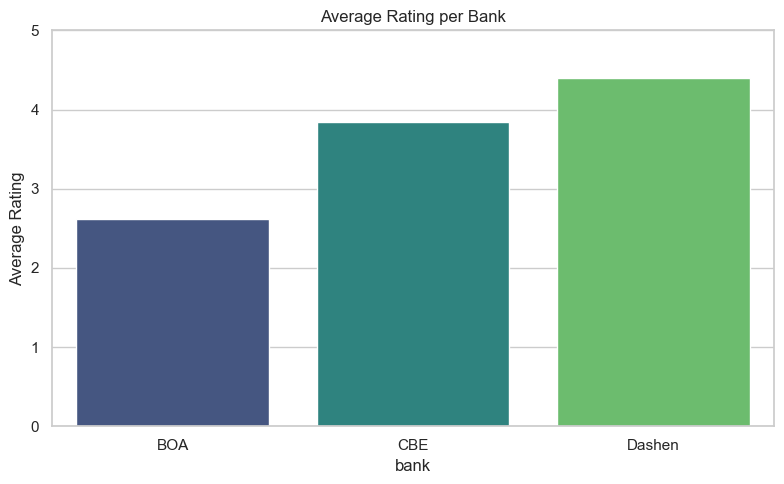

In [70]:
avg_rating = df.groupby('bank')['rating'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rating, x='bank', y='rating', palette='viridis')
plt.title('Average Rating per Bank')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


In [71]:
avg_rating

,bank,rating
0,BOA,2.622137
1,CBE,3.843688
2,Dashen,4.396694


The image shows the "Average Rating per Bank" for three different banks: BOA, CBE bank, and Dashen. The data is presented in a bar chart format, with each bank's average rating displayed as a vertical bar.

Based on the information provided in the chart:

- BOA has an average rating of around 2.62
- CBE bank has an average rating of around 3.84
- Dashen has the highest average rating, at around 4.39

This data suggests that Dashen bank has the highest customer satisfaction or rating among the three banks shown, while BOA has the lowest average rating.

### Word Cloud for Review Texts

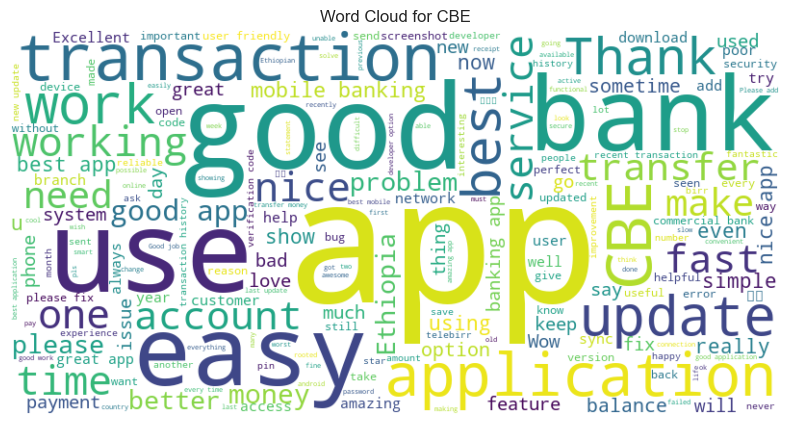

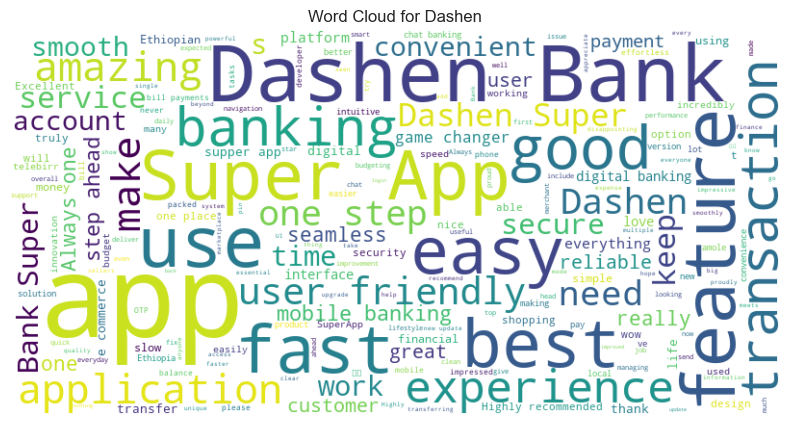

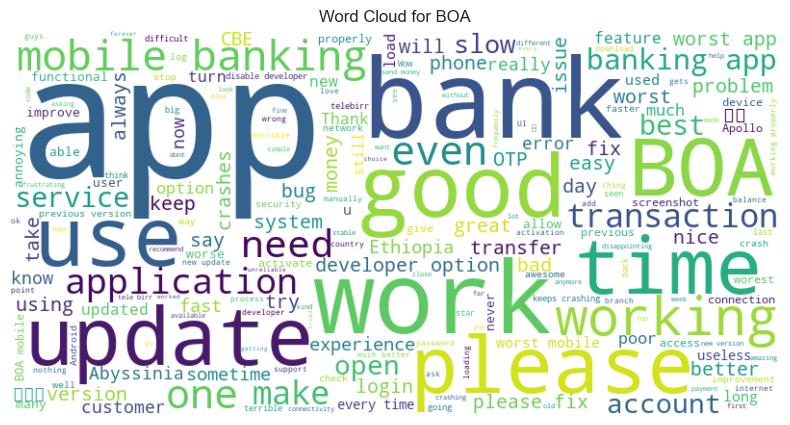

In [72]:
from wordcloud import WordCloud

# Combine all reviews per bank
for bank in df['bank'].unique():
    text = ' '.join(df[df['bank'] == bank]['review'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {bank}")
    plt.show()
